<a href="https://colab.research.google.com/github/lambdaps/TensorFlow-Notebook/blob/master/Basic%20Classification%20-%20Fashion%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.13.1


In [3]:
#Import the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Class names used along train labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)
(60000,)
9


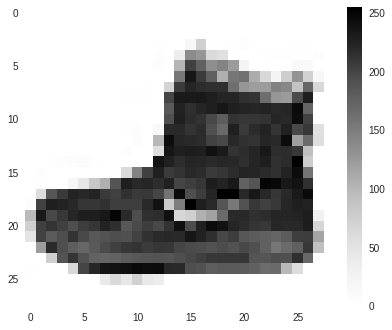

In [4]:
#Explore Data
print(train_images.shape)
print(train_labels.shape)
print(train_labels[0])

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
#Preprocess the data, values should be between 0 and 1
train_images = train_images / 255.0

test_images = test_images / 255.0

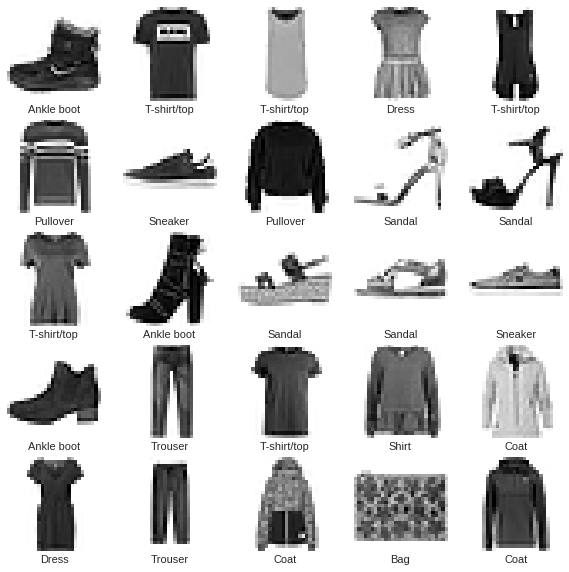

In [6]:
#Display first images of the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
#Build the model
#1. Flatten input from 28,28 to 784,1
#2. Pass thru a fully connected layer with 128 nodes, and a relu activation function
#3. Pass thru a fully connected layer with 10 nodes and a softmax activation function (returns an array of 10 probability scores that sum to 1)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.4943 - acc: 0.8277
Epoch 2/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3726 - acc: 0.8654
Epoch 3/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3332 - acc: 0.8779
Epoch 4/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3119 - acc: 0.8848
Epoch 5/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2918 - acc: 0.8923


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3550 - acc: 0.8727
Test accuracy: 0.8727


In [0]:
#With the model trained, we can use it to make predictions about some images.
predictions = model.predict(test_images)

In [12]:
predictions[0]

array([8.2482200e-07, 1.0022135e-09, 2.5622521e-08, 1.0822538e-11,
       3.1441411e-07, 1.4361150e-03, 1.2549985e-07, 1.3673395e-03,
       3.4261750e-06, 9.9719185e-01], dtype=float32)

In [14]:
#A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. 
#We can see which label has the highest confidence value:


np.argmax(predictions[0])


9

In [15]:
test_labels[0]

9

In [0]:
#We can graph this to look at the full set of 10 channels
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

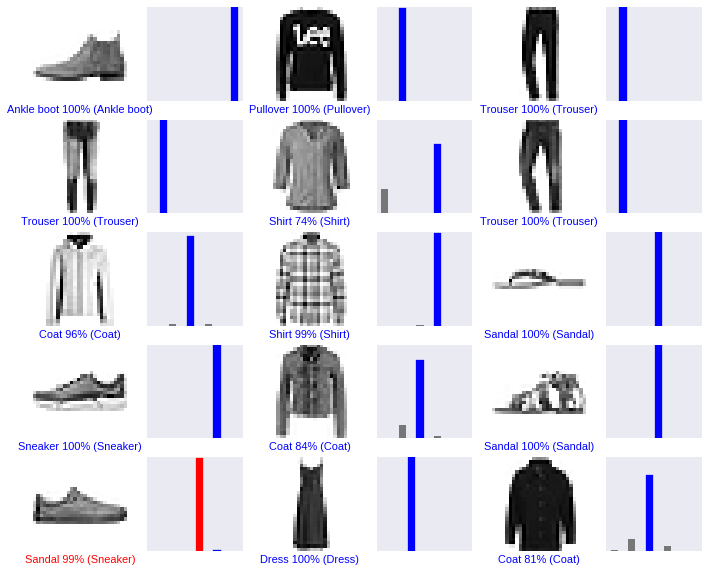

In [17]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(28, 28)
(1, 28, 28)
[[8.2482120e-07 1.0022116e-09 2.5622521e-08 1.0822518e-11 3.1441323e-07
  1.4361137e-03 1.2549961e-07 1.3673395e-03 3.4261682e-06 9.9719185e-01]]


9

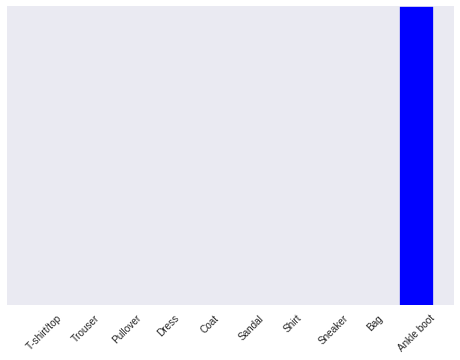

In [18]:
#Finally, use the trained model to make a prediction about a single image.
img = test_images[0]

print(img.shape)

#tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

#Now predict the image
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

#model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:
np.argmax(predictions_single[0])